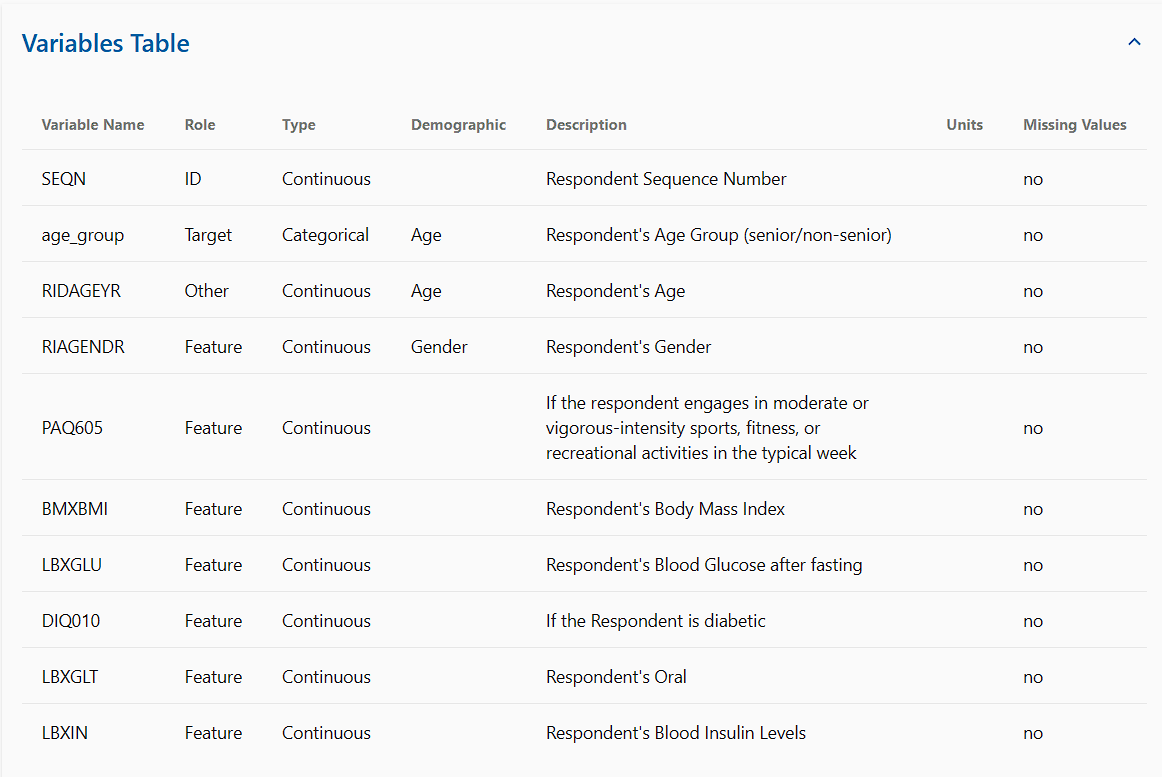

## Introduction

 In recent years, the increasing availability of data in healthcare has become an invaluable source of information. However, the complexity of these datasets requires a meticulous analytical approach to extract valuable insights. In this context, the proposed project stands out as a unique opportunity to explore the NHANES (National Health and Nutrition Examination Survey) dataset, a key initiative funded by the U.S. Centers for Disease Control and Prevention (CDC) through the National Center for Health Statistics (NCHS).

 NHANES is a veritable treasure trove of information on the health and nutritional status of adults and children on U.S. soil. Collected through interviews, physical examinations, and laboratory tests, this dataset not only reflects the diversity of the population but also offers a comprehensive view of the health conditions prevalent in the country. With its extensive coverage and richness of variables, NHANES presents itself as a fertile ground for the exploration and application of advanced data analysis techniques.

## Project Objective

The fundamental purpose of this project is to conduct a robust and comprehensive analysis of the NHANES dataset, aiming to identify patterns, trends, and relationships that can inform and enrich our understanding of health and nutrition in the United States. As a data analyst, my task is to employ advanced preparation, modeling, and visualization methods in order to extract deep and relevant insights from this complex data.

### Expected

Throughout this project, I hope to contribute to a deeper understanding of the factors that impact the health of the American population. Identifying relationships between key variables, applying advanced machine learning techniques, and exploring potential clusters will open doors to more effective disease intervention and prevention strategies. In addition, comparative analysis between different demographic groups, notably between the "elderly" and the "non-elderly," will provide valuable insight into the specific needs of these distinct populations.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [40]:
df = pd.read_csv('NHANES_age_prediction.csv')

## Data Understanding

In this phase we will Gather the data required for the project.
Performing an initial exploration of the data to gain an understanding of its contents.

To achieve this we will:
- Evaluating the quality of the data and pinpoint any possible problems.
- Understand the file size (Number of rows and columns)
- Map the type of data in the dataset.
- Identify missing values and duplicate information
- Statistical analysis of the database: This step is necessary to prepare the basis for the following processes of statistical analysis.
- Obtain the statistical summary of the database.
- Display graphically.


#### Description of Variables:

 - SEQN (Respondent Sequence Number): Continuous variable that represents the sequence number assigned to each respondent in the study, providing a unique identification.

* age_group (Age Group): Categorical variable, the target variable of our study, defines the age range of the respondent, distinguishing between "senior" and "non-elderly".

* RIDAGEYR (Respondent's Age): Continuous variable that expresses the exact age of the respondent.

* RIAGENDR (Gender): Continuous variable representing the respondent's gender, where specific values denote male or female gender.

* PAQ605 (Physical Activity): Continuous variable that assesses whether the respondent engages in moderate- or vigorous-intensity sports, fitness, or recreational activities during a typical week.

* BMXBMI (Body Mass Index): Continuous variable indicating the respondent's Body Mass Index, providing a measure of body composition.

* LBXGLU (Post-Fasting Blood Glucose): A continuous variable representing the respondent's blood glucose levels after a period of fasting.

* DIQ010 (Diabetes): Continuous variable indicating whether the respondent is diabetic.

* LBXGLT (Respondent's Oral): A continuous variable that reflects the respondent's oral characteristics.

* LBXIN (Insulin Levels): Continuous variable that provides information about the respondent's blood insulin levels.

These variables represent crucial facets of participants' health and lifestyle, paving the way for in-depth analysis and identification of meaningful patterns. The next step will be the application of data preparation techniques to ensure that they are ready for subsequent modeling and analysis.


In [41]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


In [43]:
df.shape

(2278, 10)

In [44]:
df.isnull().sum()

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [45]:
num_atributes = len(df.columns)

In [46]:
display(num_atributes)

10

In [47]:
num_observations = len(df)

In [48]:
display(num_observations)

2278

In [49]:
# statistical analysis
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


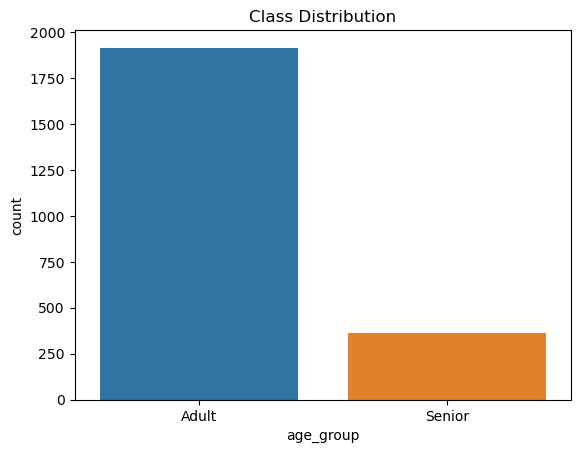

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


# Class distribution visualization
sns.countplot(x='age_group', data=df)
plt.title('Class Distribution')
plt.show()






### The correlation matrix



* The correlation matrix helps identify patterns of behavior between different traits, making it a valuable measure for understanding how specific variables are related to each other. This analysis is critical in research, allowing insights into dependencies and mutual influences between the different elements of a dataset.

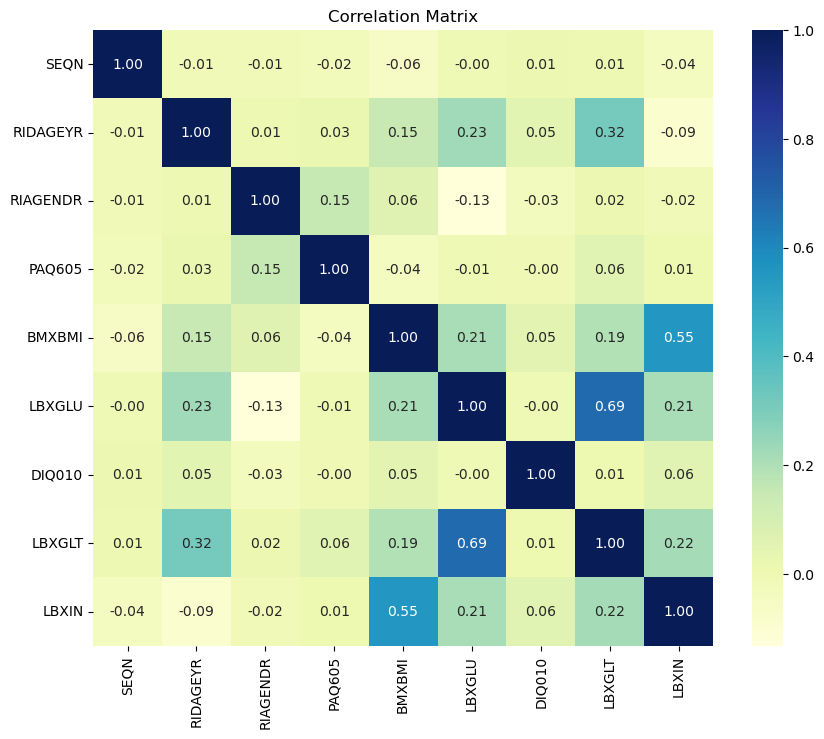

In [51]:
# Correlation matrix 
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")  
plt.title('Correlation Matrix')
plt.show()


#### Age_group - RIDAGEYR (0.68):

* This moderate positive correlation (0.68) suggests that there is an association between the variable representing age groups (age_group) and age in years (RIDAGEYR). This indicates that, in general, as age groups increase, the average age also tends to increase.

* This correlation is expected, as age groups are usually defined based on age, so it is natural to observe a positive relationship.

#### BMXBMI - LBXIN (0.55):

* This moderate positive correlation (0.55) indicates an association between body mass index (BMI - BMXBMI) and insulin (LBXIN). This suggests that, in general, as body mass index increases, insulin levels also tend to increase.

* This correlation is consistent with medical knowledge, as body mass index and insulin levels are related to metabolic health and body composition.

#### LBXGLT - LBXGLU (0.69):

* This strong positive correlation (0.69) suggests an association between triglyceride (LBXGLT) and glucose (LBXGLU) levels. This indicates that, in general, as triglyceride levels increase, glucose levels also tend to increase.

* This correlation is relevant to understanding metabolic health, as triglycerides and glucose are related to common metabolic processes, such as blood glucose regulation.

#### [The correlations identified offer insights into the relationships in the dataset. The interpretation of these results requires consideration of the context of the study, characteristics of the population, and consultation of the medical literature to validate the observed associations.]




# Encoding



### Preparation for Modeling:

 Many machine learning algorithms require the input variables to be numeric. By converting categorical variables into numerical values, we make the data compatible with these algorithms.

* Data Consistency:

 Encoding ensures consistency in data types. By representing categories by numbers, we avoid ambiguity and make it easier for the machine to interpret the data.

* Standardization of Input:

 In some cases, standardizing variables can improve the performance of models. Coding is often accompanied by additional steps, such as standardization using StandardScaler, which normalizes numerical variables.

* Facilitates Analysis and Visualizations:

o Numerically encoded data is more easily manipulated in statistical analysis and visualizations. In addition, many algorithms and data analysis techniques are designed to handle numerical inputs.

In [52]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Categorical variables encoding
le = LabelEncoder()
df['age_group'] = le.fit_transform(df['age_group'])


In [53]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,0,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,0,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,0,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,0,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,0,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


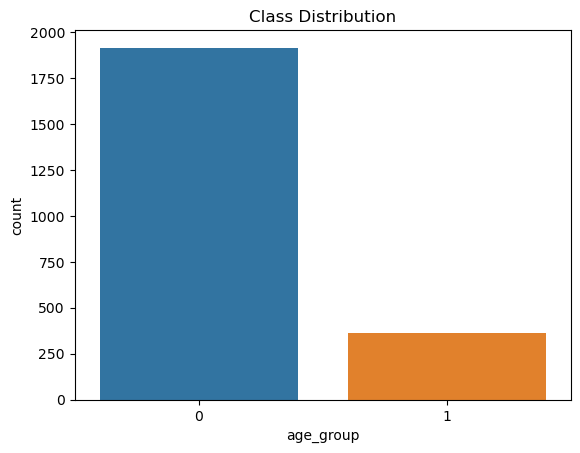

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns


# Class distribution visualization
sns.countplot(x='age_group', data=df)
plt.title('Class Distribution')
plt.show()


###### In this case, we know that there are no major data quality issues, so we'll go ahead and build the model.

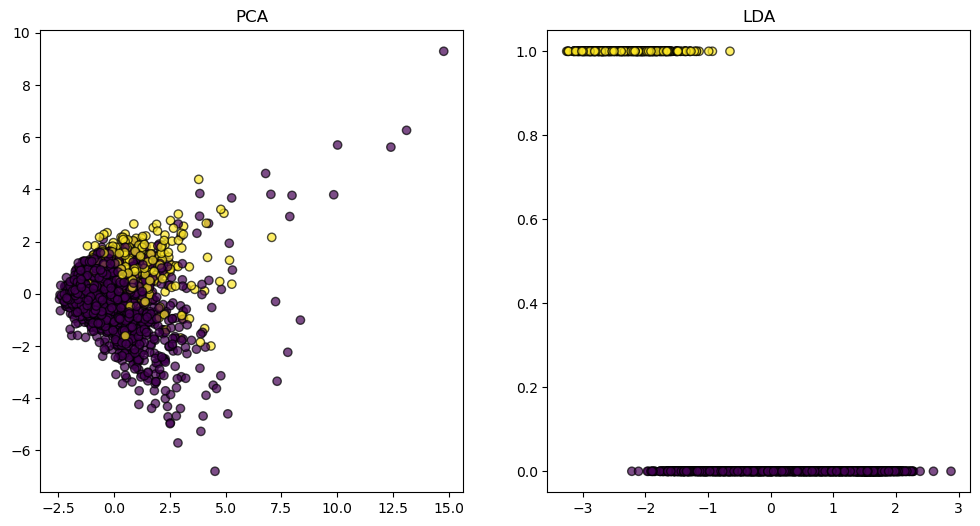

In [69]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Separating the target variable 'age_group'
X = df.drop('age_group', axis=1)
y = df['age_group']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Checking the number of unique classes to adjust n_components for LDA
num_classes = len(df['age_group'].unique())
n_components_lda = min(X.shape[1], num_classes - 1)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Applying LDA
lda = LDA(n_components=n_components_lda)
lda_result = lda.fit_transform(X_scaled, y_encoded)

# Visualizing PCA and LDA 
plt.figure(figsize=(12, 6))

# Visualizing PCA
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA')

# Visualizing LDA
plt.subplot(1, 2, 2)
plt.scatter(lda_result, y_encoded, c=y_encoded, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('LDA')

plt.show()


### Explanation of PCA and LDA Charts:

#####  PCA (Principal Component Analysis):

* The PCA chart shows a distribution of the data across two dimensions that capture most of the variability in the dataset.

* Most of the points are concentrated between 2 on the x-axis and 2.5 on the y-axis, indicating that most of the variance in the data is in this region.
However, it is noticeable that the data is mixed, suggesting that there is no clear separation between the classes.

##### LDA (Linear Discriminant Analysis):

* In the LDA chart, we notice a more structured arrangement of the data in relation to classes.

* The yellow dots extend horizontally between approximately 1 and -1 on the x-axis, indicating a clear separation from the discriminant axis found by the LDA.

* The purple dots are most concentrated around 0 on the x-axis and extend horizontally between -2 and 2 on the y-axis.

General Interpretation:

* The PCA reveals the overall structure of the data, highlighting areas of high variability, but not necessarily indicating the separation between classes.

* LDA, on the other hand, is designed to find the direction that best separates the classes, resulting in a more discriminant arrangement of the data.

* The joint analysis of PCA and LDA provides valuable insights into the structure of the data. While the PCA highlights the overall variability, the LDA focuses on the separation of classes.

* Observation of mixed data in the PCA suggests that classes may overlap, while the clearer structure in LDA indicates an ability to discriminate between classes.

In summary, the combination of PCA and LDA allows for a comprehensive view of the distribution and separation of data, providing valuable information for analysis and modeling tasks.